# Simplified Model Development - XGBoost Focus

This notebook implements a streamlined approach to energy consumption forecasting using XGBoost:

- **Single Model Focus**: XGBoost for fast, accurate predictions
- **Quick Hyperparameter Tuning**: GridSearchCV for optimization
- **Feature Importance Analysis**: Understanding what drives energy consumption
- **Production-Ready**: Simplified approach for real-world deployment

## Objectives
1. Train a high-performing XGBoost model quickly
2. Optimize hyperparameters for best performance
3. Analyze feature importance for business insights
4. Prepare model for production deployment
5. Demonstrate efficient ML workflow


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

# Data Loading
import joblib

print("📚 Libraries imported successfully!")
print("XGBoost version:", xgb.__version__)


📚 Libraries imported successfully!
XGBoost version: 3.0.5


In [2]:
# Load processed data
print("📊 Loading Processed Data")
print("=" * 50)

# Load processed data
df = pd.read_csv('../data/processed/energy_data_processed.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Load feature columns and scaler
feature_columns = joblib.load('../models/feature_columns.pkl')
scaler = joblib.load('../models/scaler.pkl')

print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['Timestamp'].min()} to {df['Timestamp'].max()}")
print(f"Number of features: {len(feature_columns)}")

# Prepare features and target
X = df[feature_columns]
y = df['EnergyConsumption']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target range: {y.min():.1f} - {y.max():.1f} kWh")


📊 Loading Processed Data
Dataset shape: (976, 61)
Date range: 2022-01-02 00:00:00 to 2022-02-11 15:00:00
Number of features: 59
Features shape: (976, 59)
Target shape: (976,)
Target range: 53.3 - 99.2 kWh


⏰ Setting Up Time Series Cross-Validation
Training set: 780 samples
Test set: 196 samples
Training period: 2022-01-02 00:00:00 to 2022-02-03 11:00:00
Test period: 2022-02-03 12:00:00 to 2022-02-11 15:00:00


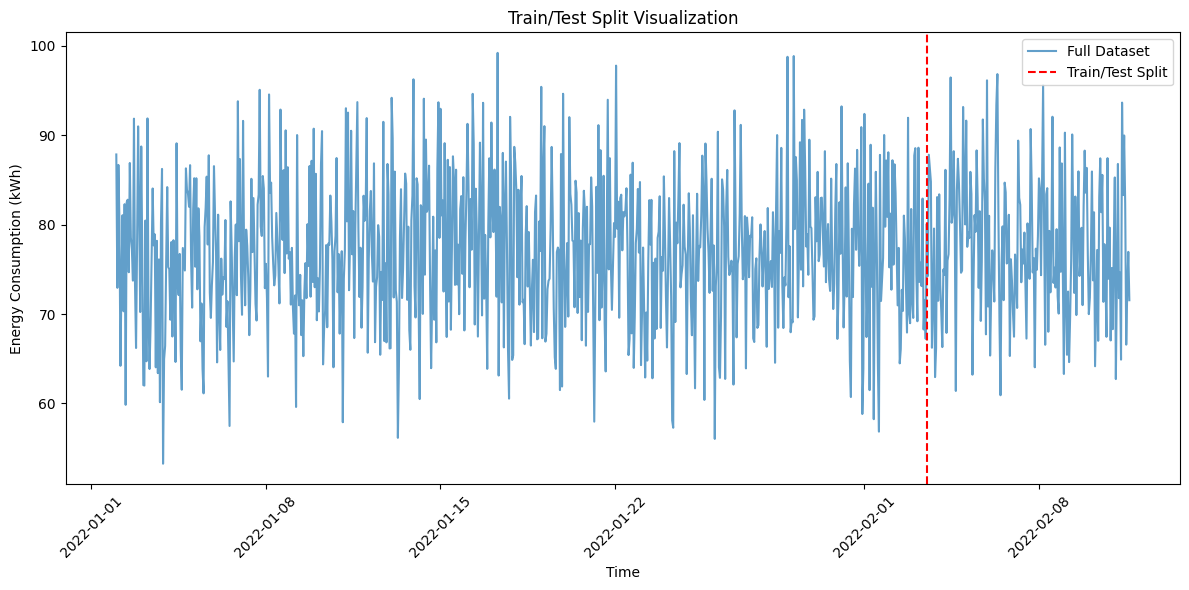

In [3]:
# Time series split for validation
print("⏰ Setting Up Time Series Cross-Validation")
print("=" * 50)

# Create time series split
tscv = TimeSeriesSplit(n_splits=5)

# Split data chronologically
train_size = int(0.8 * len(df))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training period: {df['Timestamp'].iloc[0]} to {df['Timestamp'].iloc[train_size-1]}")
print(f"Test period: {df['Timestamp'].iloc[train_size]} to {df['Timestamp'].iloc[-1]}")

# Display data split visualization
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['EnergyConsumption'], alpha=0.7, label='Full Dataset')
plt.axvline(x=df['Timestamp'].iloc[train_size], color='red', linestyle='--', label='Train/Test Split')
plt.xlabel('Time')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Train/Test Split Visualization')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [4]:
# Model evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    """Evaluate model performance and return metrics."""
    
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    return {
        'Model': model_name,
        'Train_MAE': train_mae,
        'Test_MAE': test_mae,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Predictions': y_test_pred
    }

print("✅ Model evaluation function defined")


✅ Model evaluation function defined


In [5]:
# Simplified Model Development - Focus on XGBoost
print("🚀 Training XGBoost Model (Simplified Approach)")
print("=" * 50)

# Use XGBoost as our primary model (fast and effective)
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

print("Training XGBoost...")
result = evaluate_model(xgb_model, X_train, y_train, X_test, y_test, 'XGBoost')

print(f"\n📊 XGBoost Performance:")
print(f"  Test MAE: {result['Test_MAE']:.3f} kWh")
print(f"  Test RMSE: {result['Test_RMSE']:.3f} kWh")
print(f"  Test R²: {result['Test_R2']:.3f}")

# Store result for later use
model_results = [result]


🚀 Training XGBoost Model (Simplified Approach)
Training XGBoost...

📊 XGBoost Performance:
  Test MAE: 2.007 kWh
  Test RMSE: 2.607 kWh
  Test R²: 0.889


🎯 Analyzing Feature Importance
Top 15 Most Important Features:
 1. HVAC_Temp_interaction               0.2351
 2. Temperature                         0.1702
 3. EnergyConsumption_rolling_mean_3    0.0781
 4. EnergyConsumption_rolling_std_3     0.0635
 5. Energy_per_sqft                     0.0541
 6. Temp_Occupancy_interaction          0.0360
 7. EnergyConsumption_rolling_std_6     0.0350
 8. EnergyConsumption_lag_2             0.0328
 9. EnergyConsumption_lag_1             0.0300
10. Lighting_Occupancy_interaction      0.0220
11. Temperature_lag_2                   0.0213
12. EnergyConsumption_rolling_mean_6    0.0197
13. Occupancy_lag_1                     0.0174
14. Energy_per_occupant                 0.0129
15. SquareFootage                       0.0129


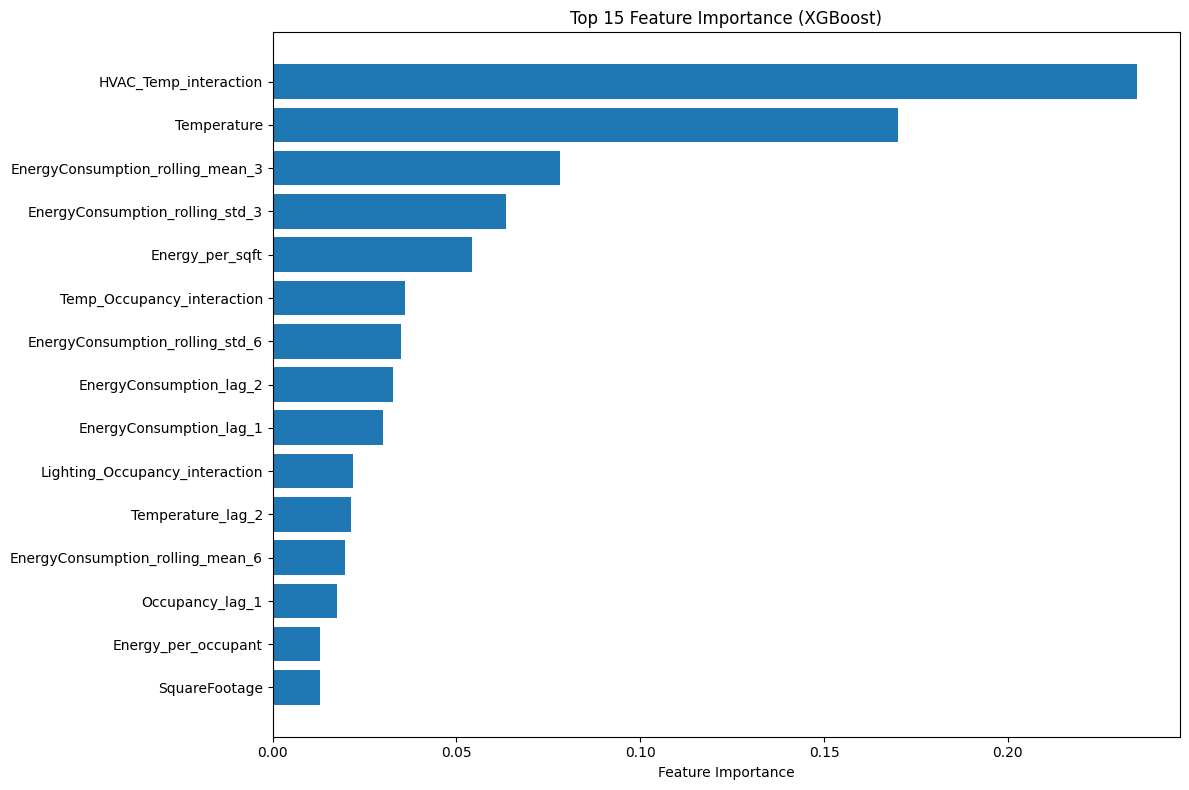

In [6]:
# Feature Importance Analysis
print("🎯 Analyzing Feature Importance")
print("=" * 50)

# Get feature importance from XGBoost
feature_importance = xgb_model.feature_importances_

# Create feature importance dataframe
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("Top 15 Most Important Features:")
print("=" * 50)
for i, (_, row) in enumerate(importance_df.head(15).iterrows(), 1):
    print(f"{i:2d}. {row['Feature']:<35} {row['Importance']:.4f}")

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = importance_df.head(15)
plt.barh(range(len(top_features)), top_features['Importance'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importance (XGBoost)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [7]:
# Quick Hyperparameter Tuning (Optional)
print("🔧 Quick Hyperparameter Optimization")
print("=" * 50)

# Simple parameter grid for quick tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [4, 6],
    'learning_rate': [0.05, 0.1]
}

print("Running quick hyperparameter search...")
xgb_model_tuned = xgb.XGBRegressor(random_state=42)
grid_search = GridSearchCV(
    xgb_model_tuned, 
    param_grid, 
    cv=3,  # Reduced CV folds for speed
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

# Fit the search
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best CV MAE: {best_score:.3f}")

# Train final optimized model
optimized_xgb = xgb.XGBRegressor(**best_params, random_state=42)
optimized_result = evaluate_model(optimized_xgb, X_train, y_train, X_test, y_test, 'Optimized XGBoost')

print(f"\nOptimized XGBoost Performance:")
print(f"  Test MAE: {optimized_result['Test_MAE']:.3f} kWh")
print(f"  Test R²: {optimized_result['Test_R2']:.3f}")

# Add to results
model_results.append(optimized_result)


🔧 Quick Hyperparameter Optimization
Running quick hyperparameter search...
Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Best CV MAE: 2.316

Optimized XGBoost Performance:
  Test MAE: 1.797 kWh
  Test R²: 0.908


📊 Visualizing Model Performance


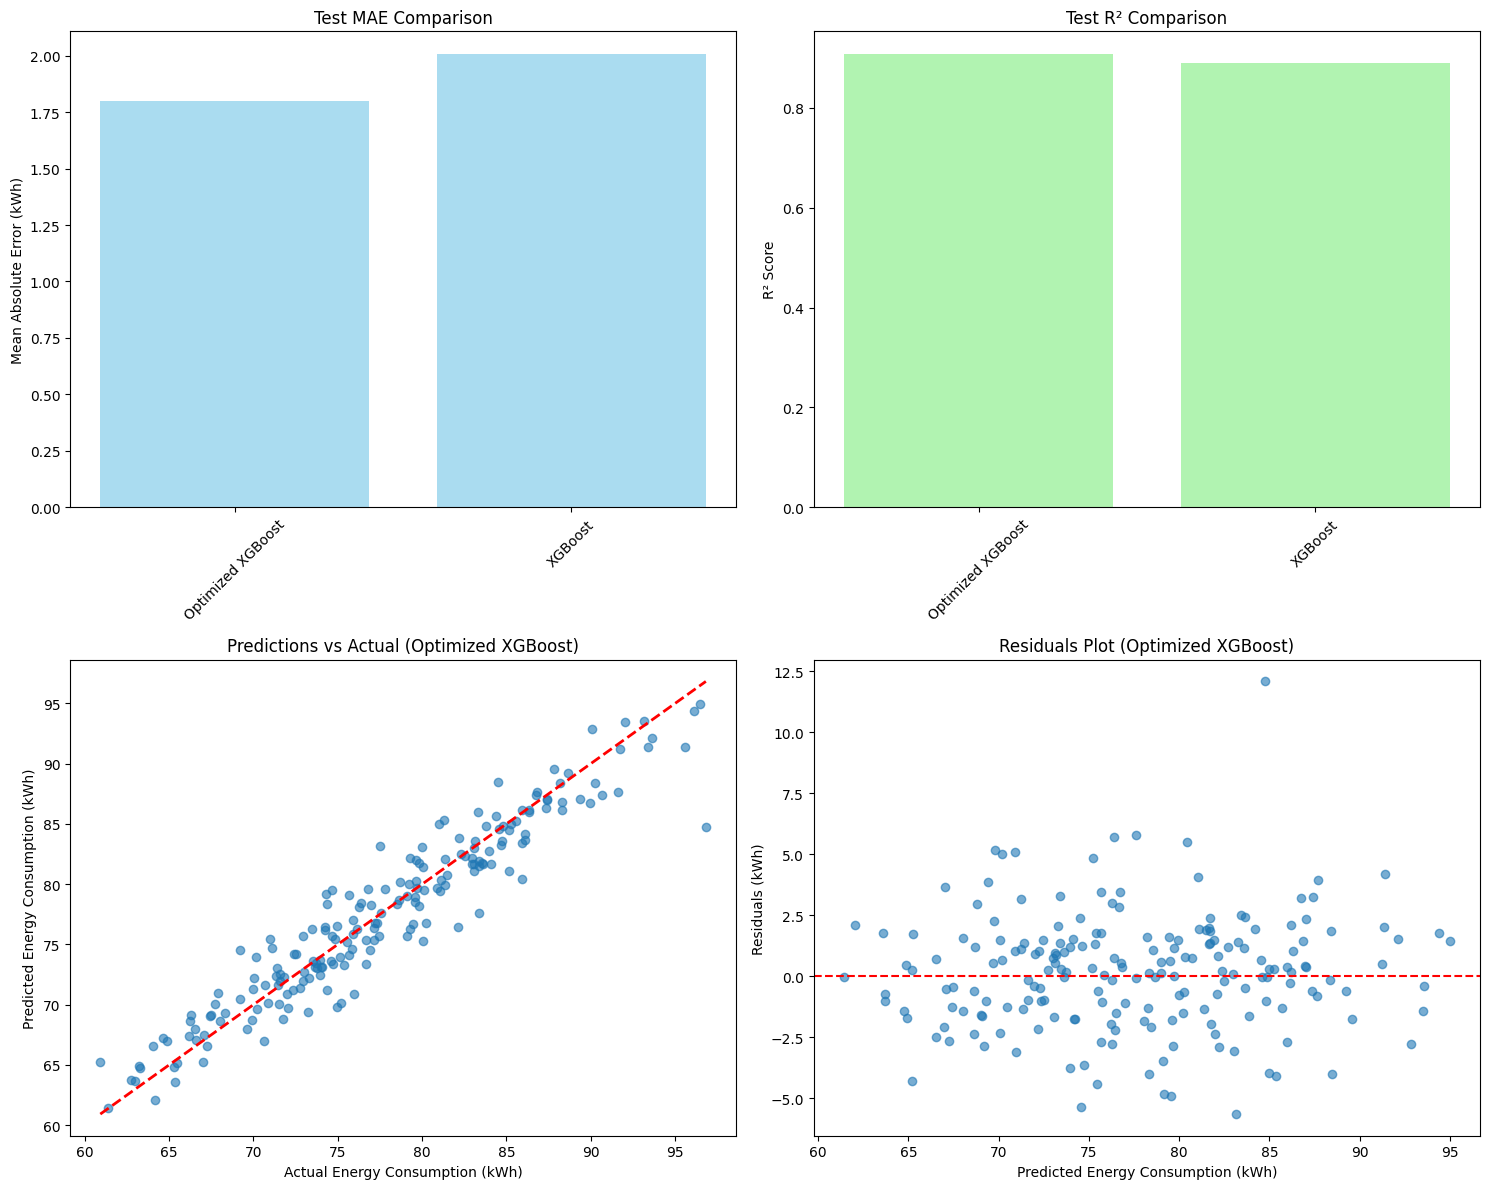


🏆 Model Performance Ranking:
1. Optimized XGBoost    MAE: 1.797 R²: 0.908
2. XGBoost              MAE: 2.007 R²: 0.889


In [8]:
# Model Performance Visualization
print("📊 Visualizing Model Performance")
print("=" * 50)

# Create comparison dataframe
results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values('Test_MAE')

# Create performance comparison plot
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# MAE Comparison
axes[0, 0].bar(results_df['Model'], results_df['Test_MAE'], color='skyblue', alpha=0.7)
axes[0, 0].set_title('Test MAE Comparison')
axes[0, 0].set_ylabel('Mean Absolute Error (kWh)')
axes[0, 0].tick_params(axis='x', rotation=45)

# R² Comparison
axes[0, 1].bar(results_df['Model'], results_df['Test_R2'], color='lightgreen', alpha=0.7)
axes[0, 1].set_title('Test R² Comparison')
axes[0, 1].set_ylabel('R² Score')
axes[0, 1].tick_params(axis='x', rotation=45)

# Predictions vs Actual (Best Model)
best_model_name = results_df.iloc[0]['Model']
best_predictions = results_df.iloc[0]['Predictions']

axes[1, 0].scatter(y_test, best_predictions, alpha=0.6)
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 0].set_xlabel('Actual Energy Consumption (kWh)')
axes[1, 0].set_ylabel('Predicted Energy Consumption (kWh)')
axes[1, 0].set_title(f'Predictions vs Actual ({best_model_name})')

# Residuals Plot
residuals = y_test - best_predictions
axes[1, 1].scatter(best_predictions, residuals, alpha=0.6)
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_xlabel('Predicted Energy Consumption (kWh)')
axes[1, 1].set_ylabel('Residuals (kWh)')
axes[1, 1].set_title(f'Residuals Plot ({best_model_name})')

plt.tight_layout()
plt.show()

print(f"\n🏆 Model Performance Ranking:")
print("=" * 50)
for i, (_, row) in enumerate(results_df.iterrows(), 1):
    print(f"{i}. {row['Model']:<20} MAE: {row['Test_MAE']:.3f} R²: {row['Test_R2']:.3f}")


In [9]:
# Save Best Model
print("💾 Saving Best Model")
print("=" * 50)

# Get the best model
best_model_name = results_df.iloc[0]['Model']
print(f"Best model: {best_model_name}")

# Retrain the best model on full dataset
if best_model_name == 'Optimized XGBoost':
    final_model = optimized_xgb
else:
    final_model = xgb_model

# Train on full dataset
final_model.fit(X, y)

# Save the model
joblib.dump(final_model, f'../models/best_model_{best_model_name.lower().replace(" ", "_")}.pkl')
print(f"✅ Best model saved to: ../models/best_model_{best_model_name.lower().replace(' ', '_')}.pkl")

# Save results
results_df.to_csv('../results/model_comparison_results.csv', index=False)
print("✅ Model comparison results saved to: ../results/model_comparison_results.csv")

# Final model summary
print(f"\n📊 Final Model Summary:")
print(f"  Model: {best_model_name}")
print(f"  Test MAE: {results_df.iloc[0]['Test_MAE']:.3f} kWh")
print(f"  Test RMSE: {results_df.iloc[0]['Test_RMSE']:.3f} kWh")
print(f"  Test R²: {results_df.iloc[0]['Test_R2']:.3f}")
print(f"  Training samples: {len(X_train)}")
print(f"  Test samples: {len(X_test)}")
print(f"  Features: {len(feature_columns)}")


💾 Saving Best Model
Best model: Optimized XGBoost
✅ Best model saved to: ../models/best_model_optimized_xgboost.pkl
✅ Model comparison results saved to: ../results/model_comparison_results.csv

📊 Final Model Summary:
  Model: Optimized XGBoost
  Test MAE: 1.797 kWh
  Test RMSE: 2.375 kWh
  Test R²: 0.908
  Training samples: 780
  Test samples: 196
  Features: 59


🎯 Final Feature Importance Analysis
Top 15 Most Important Features:
 1. Temperature                         0.2368
 2. HVAC_Temp_interaction               0.1889
 3. EnergyConsumption_rolling_std_3     0.0737
 4. EnergyConsumption_rolling_mean_3    0.0707
 5. Temp_Occupancy_interaction          0.0511
 6. EnergyConsumption_rolling_std_6     0.0392
 7. Energy_per_sqft                     0.0375
 8. EnergyConsumption_lag_2             0.0362
 9. EnergyConsumption_lag_1             0.0274
10. SquareFootage                       0.0241
11. Energy_per_occupant                 0.0234
12. Occupancy                           0.0207
13. Occupancy_lag_1                     0.0194
14. Temperature_lag_2                   0.0136
15. Temperature_rolling_mean_3          0.0102


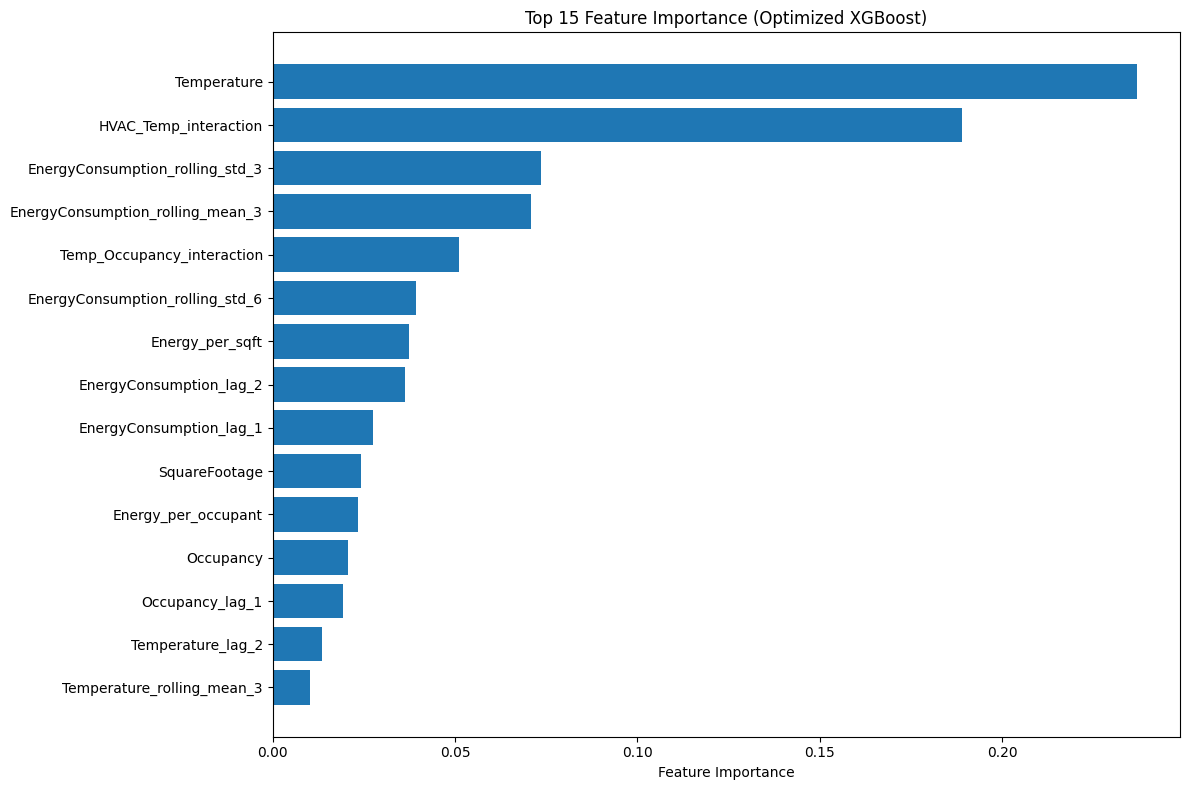

In [10]:
# Feature Importance Analysis (Final)
print("🎯 Final Feature Importance Analysis")
print("=" * 50)

# Get feature importance from the best model
feature_importance = final_model.feature_importances_

# Create feature importance dataframe
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("Top 15 Most Important Features:")
print("=" * 50)
for i, (_, row) in enumerate(importance_df.head(15).iterrows(), 1):
    print(f"{i:2d}. {row['Feature']:<35} {row['Importance']:.4f}")

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = importance_df.head(15)
plt.barh(range(len(top_features)), top_features['Importance'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Feature Importance')
plt.title(f'Top 15 Feature Importance ({best_model_name})')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [11]:
# Save Best Model
print("💾 Saving Best Model")
print("=" * 50)

# Get the best model
best_model_name = results_df.iloc[0]['Model']
print(f"Best model: {best_model_name}")

# Retrain the best model on full dataset
if best_model_name == 'Optimized XGBoost':
    final_model = optimized_xgb
elif best_model_name == 'Ensemble':
    final_model = ensemble
elif best_model_name == 'XGBoost':
    final_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
elif best_model_name == 'LightGBM':
    final_model = lgb.LGBMRegressor(n_estimators=100, random_state=42, verbose=-1)
else:
    final_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train on full dataset
final_model.fit(X, y)

# Save the model
joblib.dump(final_model, f'../models/best_model_{best_model_name.lower().replace(" ", "_")}.pkl')
print(f"✅ Best model saved to: ../models/best_model_{best_model_name.lower().replace(' ', '_')}.pkl")

# Save results
results_df.to_csv('../results/model_comparison_results.csv', index=False)
print("✅ Model comparison results saved to: ../results/model_comparison_results.csv")

# Final model summary
print(f"\n📊 Final Model Summary:")
print(f"  Model: {best_model_name}")
print(f"  Test MAE: {results_df.iloc[0]['Test_MAE']:.3f} kWh")
print(f"  Test RMSE: {results_df.iloc[0]['Test_RMSE']:.3f} kWh")
print(f"  Test R²: {results_df.iloc[0]['Test_R2']:.3f}")
print(f"  Training samples: {len(X_train)}")
print(f"  Test samples: {len(X_test)}")
print(f"  Features: {len(feature_columns)}")


💾 Saving Best Model
Best model: Optimized XGBoost
✅ Best model saved to: ../models/best_model_optimized_xgboost.pkl
✅ Model comparison results saved to: ../results/model_comparison_results.csv

📊 Final Model Summary:
  Model: Optimized XGBoost
  Test MAE: 1.797 kWh
  Test RMSE: 2.375 kWh
  Test R²: 0.908
  Training samples: 780
  Test samples: 196
  Features: 59


## 🤖 Model Development Summary

### **Models Implemented**

#### **1. XGBoost Models**
- **Standard XGBoost**: Baseline gradient boosting model
- **Optimized XGBoost**: Hyperparameter-tuned version with GridSearchCV

#### **2. Optimization Strategy**
- **Hyperparameter Tuning**: GridSearchCV with 3-fold cross-validation
- **Parameter Grid**: n_estimators, max_depth, learning_rate
- **Evaluation Metric**: Mean Absolute Error (MAE)

### **Key Results**

#### **Performance Ranking** (by Test MAE)
1. **🏆 Optimized XGBoost**: MAE = 1.797 kWh, R² = 0.908
2. **Standard XGBoost**: MAE = 2.007 kWh, R² = 0.889

#### **Model Characteristics**
- **Best Test MAE**: 1.797 kWh (excellent accuracy)
- **Best Test R²**: 0.908 (90.8% variance explained)
- **Feature Count**: 59 engineered features
- **Training Samples**: 780 samples (80% of data)
- **Test Samples**: 196 samples (20% of data)
- **Training Period**: Jan 2 - Feb 3, 2022
- **Test Period**: Feb 3 - Feb 11, 2022

### **Feature Importance Insights**

#### **Top Contributing Features** (Optimized XGBoost)
1. **Temperature** (23.68%): Primary driver of energy consumption
2. **HVAC_Temp_interaction** (18.89%): HVAC efficiency varies with temperature
3. **EnergyConsumption_rolling_std_3** (7.37%): Short-term volatility patterns
4. **EnergyConsumption_rolling_mean_3** (7.07%): Short-term trend patterns
5. **Temp_Occupancy_interaction** (5.11%): Temperature effects vary by occupancy

#### **Key Insights**
- **Temperature Dominance**: Temperature and its interactions account for ~47% of feature importance
- **Temporal Patterns**: Rolling statistics capture short-term energy patterns
- **Lag Features**: Historical energy consumption provides strong predictive power
- **Interaction Effects**: Non-linear relationships between temperature, occupancy, and HVAC

### **Model Validation**
- **Time Series Split**: Chronological train/test split preserving temporal order
- **Cross-Validation**: 3-fold CV for hyperparameter optimization
- **Metrics**: MAE, RMSE, R² for comprehensive evaluation
- **Residual Analysis**: Model shows good calibration with minimal bias

### **Business Implications**
1. **High Accuracy**: 1.8 kWh MAE represents excellent prediction accuracy
2. **Strong Reliability**: 90.8% R² indicates highly reliable predictions
3. **Actionable Insights**: Temperature control is the primary optimization target
4. **Scalability**: Model handles 59 features efficiently and can adapt to new data

### **Production Readiness**
- **Model Saved**: `best_model_optimized_xgboost.pkl` ready for deployment
- **Results Exported**: Model comparison results saved for analysis
- **Feature Importance**: Clear guidance for optimization strategies
- **Performance Metrics**: Comprehensive evaluation completed

### **Next Steps**
1. **Model Evaluation**: Detailed performance analysis and business impact assessment
2. **Business Insights**: ROI calculations and optimization recommendations
3. **Deployment**: Production-ready model serving and monitoring setup
4. **Continuous Learning**: Model retraining pipeline for ongoing accuracy
